# Chapter 1 

## Exercise 1

This simple data analysis pipeline uses a [decision tree](https://en.wikipedia.org/wiki/Decision_tree_learning) model to classify flowers from the famous [iris dataset](https://archive.ics.uci.edu/ml/datasets/iris).

Questions:

1. Look through the example pipeline. Mark which cells belong to which categories in this categorization:
    - Data preparation and loading
    - Modeling
    - Evaluation
    - Presentation
2. Try to determine the pieces of the code that are **unique** to this specific dataset. Discuss how you would generalize this pipeline to other datasets.

## Solutions for exercise 1

1. - Data preparation and loading: Cells 1, 2, 3 and 4
   - Modeling: Cells 1 and 5
   - Evaluation: Cells 1, 6 and 7
   - Presentation: Cells 1, 5 and 8
2. The naming of the variables throughout the dataset is unique to `iris`-dataset, but it would be possible to change these to generic names.

   Likewise the target feature and plotted features could be generalized to take these from variables. Thus the only unique part is the cell where the data is loaded: Cell 2 

## Solutions in detail

This cell contains something from all categories:
- `pandas`, `numpy.random.RandomState` and `sklearn.model_selection.train_test_split` are data preparation and loading
- `sklearn.tree.DecisionTreeClassifier` is modeling
- `sklearn.metrics.accuracy_score` and `sklearn.metrics.confusion_matrix` are evaluation
- `matplotlib.pyplot`, `seaborn` and `sklearn.tree.export_text` are presentation

In [1]:
# Cell 1
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from numpy.random import RandomState
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import accuracy_score, confusion_matrix

This cell is completely dedicated to data loading. Iris dataset is loaded and `Species`-field is converted into a categorical variable. Index will be stored as a variable to verify that sampling worked (more on this later).

In [2]:
# Cell 2
iris = pd.read_csv('../data/iris.data', names=['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species'])
iris['Species'] = iris['Species'].map(lambda x: x.replace('Iris-','')).astype('category')
iris['id'] = iris.index
print(iris.head())

   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species  id
0           5.1          3.5           1.4          0.2  setosa   0
1           4.9          3.0           1.4          0.2  setosa   1
2           4.7          3.2           1.3          0.2  setosa   2
3           4.6          3.1           1.5          0.2  setosa   3
4           5.0          3.6           1.4          0.2  setosa   4


This cell is again related to data preparation. The rows in the iris dataset are shuffled with the sample function. This is verified by seeing that the new index differs from the old index. Old index is removed as it would ruin the learning process (decision tree would learn to use the index).

This step is unnecessary in the grand scheme of things as the [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)-function actually shuffles the rows, but it highlights how sampling would be accomplished and is a useful step to minimize risk of learning by index.

Random state in initialized manually to enable reproducibility.

In [3]:
# Cell 3
random_state = RandomState(seed=42)
iris = iris.sample(frac=1, random_state=random_state).reset_index(drop=True)
print(iris.head())
iris = iris.drop('id', axis=1)
print(iris.head())

   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width     Species   id
0           6.1          2.8           4.7          1.2  versicolor   73
1           5.7          3.8           1.7          0.3      setosa   18
2           7.7          2.6           6.9          2.3   virginica  118
3           6.0          2.9           4.5          1.5  versicolor   78
4           6.8          2.8           4.8          1.4  versicolor   76
   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width     Species
0           6.1          2.8           4.7          1.2  versicolor
1           5.7          3.8           1.7          0.3      setosa
2           7.7          2.6           6.9          2.3   virginica
3           6.0          2.9           4.5          1.5  versicolor
4           6.8          2.8           4.8          1.4  versicolor


This step is still data preparation, but it is very close to the modeling part. The dataset is split into training and test sets with 4 to 1 ratio.

Random state is provided to enable reproducibility.

Number of different species in train and test splits are counted to verify that the both splits have similar species proportions.

In [4]:
# Cell 4
train_split, test_split = train_test_split(iris, train_size=0.8, random_state=random_state)
print(train_split.groupby('Species').size())
print(test_split.groupby('Species').size())

Species
setosa        40
versicolor    39
virginica     41
dtype: int64
Species
setosa        10
versicolor    11
virginica      9
dtype: int64


This cell is the modeling part. Training data and target data are obtained from training split. A decision tree model is fitted into the data.

The printing of the fitted model is more related to presentation than modeling, but one could also consider it part of the modeling process.

In [5]:
# Cell 5
tree = DecisionTreeClassifier(random_state=random_state)
train_data = train_split.drop('Species', axis=1)
train_target = train_split['Species']
fitted_tree = tree.fit(train_data, train_target)
print(export_text(fitted_tree, feature_names=list(train_data.columns)))

|--- Petal.Width <= 0.80
|   |--- class: setosa
|--- Petal.Width >  0.80
|   |--- Petal.Width <= 1.70
|   |   |--- Petal.Length <= 4.95
|   |   |   |--- class: versicolor
|   |   |--- Petal.Length >  4.95
|   |   |   |--- Petal.Width <= 1.55
|   |   |   |   |--- class: virginica
|   |   |   |--- Petal.Width >  1.55
|   |   |   |   |--- Sepal.Length <= 6.60
|   |   |   |   |   |--- class: versicolor
|   |   |   |   |--- Sepal.Length >  6.60
|   |   |   |   |   |--- class: virginica
|   |--- Petal.Width >  1.70
|   |   |--- Petal.Length <= 4.85
|   |   |   |--- Sepal.Length <= 5.95
|   |   |   |   |--- class: versicolor
|   |   |   |--- Sepal.Length >  5.95
|   |   |   |   |--- class: virginica
|   |   |--- Petal.Length >  4.85
|   |   |   |--- class: virginica



This cell is related to the evaluation process.

Predictions are made based on test split and the successful predictions are recorded for future use.

In [6]:
# Cell 6
test_data = test_split.drop('Species', axis=1)
test_target = test_split['Species']
result_data = test_split.copy()
result_data['PredictedValue'] = fitted_tree.predict(test_data)
result_data['Prediction'] = result_data.apply(lambda x: x['Species'].capitalize() if x['Species'] == x['PredictedValue'] else 'Classification failure', axis=1)

This cell is also related to the evaluation process.

There are various metrics that can be used to evaluate model success. Here we are checking [the confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix) and [the accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision#In_binary_classification) of our decision tree model.

In [7]:
# Cell 7
confusion_matrix(result_data['PredictedValue'], result_data['Species'])
accuracy_score(result_data['PredictedValue'], result_data['Species'])

0.9333333333333333

This cell does plots of the data so it is related to the presentation process.

Here we create scatter plots of the `Petal`- and `Sepal`-dimensions along with the predicted species. Failures are plotted separately so that we can see why our classifier might have failed: the failures are situated along boundaries of Virginica and Versicolor.

<AxesSubplot:xlabel='Petal.Width', ylabel='Petal.Length'>

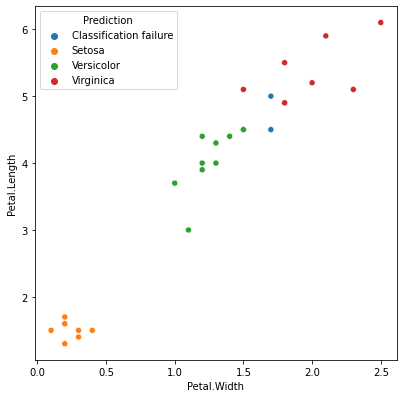

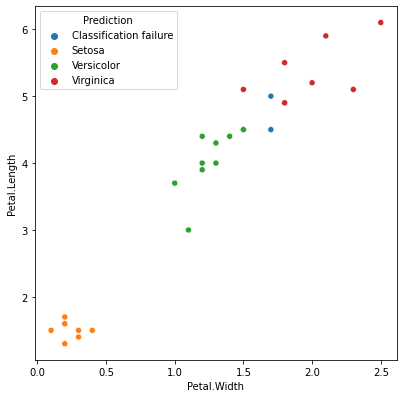

In [8]:
# Cell 8
petal_plot, petal_plot_ax = plt.subplots(figsize=(6.5, 6.5))
sb.scatterplot(x='Petal.Width', y='Petal.Length', data=test_data, hue=result_data['Prediction'])
petal_plot, petal_plot_ax = plt.subplots(figsize=(6.5, 6.5))
sb.scatterplot(x='Petal.Width', y='Petal.Length', data=test_data, hue=result_data['Prediction'])